<a href="https://colab.research.google.com/github/prince001996/Tensorflow-2.0-learning-/blob/master/fashion_mnist_CNN_image_classifier_by_edureka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
test_images.shape

(10000, 28, 28)

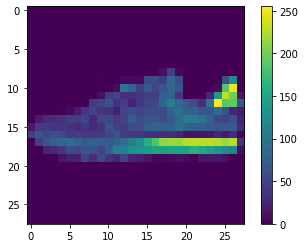

In [0]:
plt.figure()
plt.imshow(train_images[25000])
plt.colorbar()
plt.grid(False)
plt.show () 

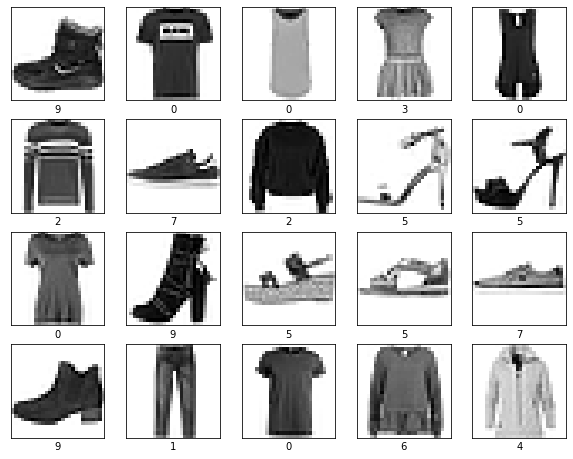

In [0]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()


In [0]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32')/255

In [0]:
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32')/255

In [0]:
train_images.shape

(60000, 28, 28, 1)

In [0]:
test_images.shape

(10000, 28, 28, 1)

In [0]:
train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

In [0]:
train_images = train_images[:-10000]
train_labels = train_labels[:-10000]
val_images = train_images[-10000:]
val_labels = train_labels[-10000:]

In [0]:
val_images.shape

(10000, 28, 28, 1)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                7

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [0]:
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.4736 - accuracy: 0.8288 - val_loss: 0.3130 - val_accuracy: 0.8882
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.3059 - accuracy: 0.8904 - val_loss: 0.2722 - val_accuracy: 0.9027
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2582 - accuracy: 0.9052 - val_loss: 0.2200 - val_accuracy: 0.9229
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2259 - accuracy: 0.9172 - val_loss: 0.1940 - val_accuracy: 0.9287
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2010 - accuracy: 0.9260 - val_loss: 0.1772 - val_accuracy: 0.9337
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.1781 - accuracy: 0.9351 - val_loss: 0.1608 - val_accuracy: 0.9408
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.1587 - accuracy: 0.9405 - val_loss: 0.1381 -

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.3530 - accuracy: 0.9030
